In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
plt.style.use('fivethirtyeight')

In [3]:
%%time
df = pd.read_csv('./Crimes_2011_to_present.csv', index_col=False, error_bad_lines=False, engine='python')

CPU times: user 29.1 s, sys: 1.69 s, total: 30.8 s
Wall time: 31.4 s


In [4]:
df.head(3)

,ID,Case.Number,Date,Block,IUCR,Primary.Type,Description,Location.Description,Arrest,Domestic,...,Ward,Community.Area,FBI.Code,X.Coordinate,Y.Coordinate,Year,Updated.On,Latitude,Longitude,Location
0,10060004,HY248774,2015-05-05,010XX W 79TH ST,0460,BATTERY,SIMPLE,SIDEWALK,false,false,...,17,71,08B,1170778.0,1852475,2015.0,05/12/2015 12:42:01 PM,41.75066697,-87.649760051,(41.75066697
1,10059982,HY248801,2015-05-05,105XX S WABASH AVE,0420,BATTERY,AGGRAVATED:KNIFE/CUTTING INSTR,RESIDENCE,false,false,...,9,49,04B,1178485.0,1834909,2015.0,05/12/2015 12:42:01 PM,41.702292131,-87.622049984,(41.702292131
2,10059953,HY248791,2015-05-05,005XX N ASHLAND AVE,2027,NARCOTICS,POSS: CRACK,SIDEWALK,true,false,...,26,24,18,1165594.0,1903713,2015.0,05/12/2015 12:42:01 PM,41.891381064,-87.66730127,(41.891381064


In [4]:
# df.drop('Location', axis=1, inplace=True)
df.drop(['Case.Number', 'IUCR', 'X.Coordinate', 'Y.Coordinate', 'Block',
         'Updated.On','Year', 'FBI.Code', 'Beat','Ward','Community.Area', 'Location'], inplace=True, axis=1)

In [5]:
df.head(3)

,ID,Date,Primary.Type,Description,Location.Description,Arrest,Domestic,District,Latitude,Longitude
0,10060004,2015-05-05,BATTERY,SIMPLE,SIDEWALK,false,false,6,41.75066697,-87.649760051
1,10059982,2015-05-05,BATTERY,AGGRAVATED:KNIFE/CUTTING INSTR,RESIDENCE,false,false,5,41.702292131,-87.622049984
2,10059953,2015-05-05,NARCOTICS,POSS: CRACK,SIDEWALK,true,false,13,41.891381064,-87.66730127


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1346119 entries, 0 to 1346118
Data columns (total 10 columns):
ID                      1346119 non-null int64
Date                    1346119 non-null object
Primary.Type            1346119 non-null object
Description             1346119 non-null object
Location.Description    1345323 non-null object
Arrest                  1346119 non-null object
Domestic                1346119 non-null object
District                1339455 non-null object
Latitude                1339499 non-null object
Longitude               1339496 non-null object
dtypes: int64(1), object(9)
memory usage: 102.7+ MB


In [7]:
df['Date'] = pd.to_datetime(df['Date'])

In [8]:
df.index = pd.DatetimeIndex(df['Date'])

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1346119 entries, 2015-05-05 to 2011-01-01
Data columns (total 10 columns):
ID                      1346119 non-null int64
Date                    1346119 non-null datetime64[ns]
Primary.Type            1346119 non-null object
Description             1346119 non-null object
Location.Description    1345323 non-null object
Arrest                  1346119 non-null object
Domestic                1346119 non-null object
District                1339455 non-null object
Latitude                1339499 non-null object
Longitude               1339496 non-null object
dtypes: datetime64[ns](1), int64(1), object(8)
memory usage: 113.0+ MB


In [10]:
df['Year'] = pd.DatetimeIndex(df['Date']).year
df['Month'] = pd.DatetimeIndex(df['Date']).month

In [11]:
df['Arrest'] = df['Arrest'].astype('bool')
df['Domestic'] = df['Domestic'].astype('bool')

In [12]:
# df['Latitude'] = pd.to_numeric(df['Latitude'])
# df[4675:4676]
df['Latitude'] = pd.to_numeric(df['Latitude'], errors='coerce')

In [13]:
# df['Longitude'] = pd.to_numeric(df['Longitude'])
df[207:208]
df['Longitude'] = pd.to_numeric(df['Longitude'], errors='coerce')

In [14]:
df['District'] = pd.to_numeric(df['District'], errors='coerce')

In [15]:
df = df[df['Latitude'].notnull()]

In [16]:
df = df[df['Longitude'].notnull()]

In [17]:
df = df[df['District'].notnull()]

In [18]:
df.head(3)

,ID,Date,Primary.Type,Description,Location.Description,Arrest,Domestic,District,Latitude,Longitude,Year,Month
Date,,,,,,,,,,,,
2015-05-05,10060004,2015-05-05,BATTERY,SIMPLE,SIDEWALK,True,True,6.0,41.750667,-87.649760,2015,5
2015-05-05,10059982,2015-05-05,BATTERY,AGGRAVATED:KNIFE/CUTTING INSTR,RESIDENCE,True,True,5.0,41.702292,-87.622050,2015,5
2015-05-05,10059953,2015-05-05,NARCOTICS,POSS: CRACK,SIDEWALK,True,True,13.0,41.891381,-87.667301,2015,5


In [19]:
loc_to_change = list(df['Location.Description'].value_counts()[20:].index)

In [20]:
desc_to_change = list(df['Description'].value_counts()[20:].index)

In [158]:
def parse_location_names(location):
    if location in loc_to_change:
        return 'OTHER'
    else:
        return location

In [160]:
# df.loc[df['Location.Description'].dropna().isin(loc_to_change), df.columns == 'Location.Description'] = 'OTHER'
# --------------------

df['Location.Description'] = df['Location.Description'].map(parse_location_names)


In [22]:
df.loc[df['Description'].dropna().isin(desc_to_change), df.columns == 'Description'] = 'OTHER'

In [23]:
print(df['Primary.Type'].value_counts().index)
print(df['Description'].value_counts().index)
print(df['Location.Description'].value_counts().index)

Index(['THEFT', 'BATTERY', 'NARCOTICS', 'CRIMINAL DAMAGE', 'BURGLARY',
       'OTHER OFFENSE', 'ASSAULT', 'MOTOR VEHICLE THEFT', 'DECEPTIVE PRACTICE',
       'ROBBERY', 'CRIMINAL TRESPASS', 'WEAPONS VIOLATION',
       'PUBLIC PEACE VIOLATION', 'OFFENSE INVOLVING CHILDREN', 'PROSTITUTION',
       'CRIM SEXUAL ASSAULT', 'INTERFERENCE WITH PUBLIC OFFICER',
       'SEX OFFENSE', 'GAMBLING', 'LIQUOR LAW VIOLATION', 'HOMICIDE', 'ARSON',
       'KIDNAPPING', 'STALKING', 'INTIMIDATION', 'OBSCENITY',
       'PUBLIC INDECENCY', 'NON-CRIMINAL', 'OTHER NARCOTIC VIOLATION',
       'CONCEALED CARRY LICENSE VIOLATION', 'NON - CRIMINAL',
       'HUMAN TRAFFICKING', 'NON-CRIMINAL (SUBJECT SPECIFIED)'],
      dtype='object')
Index(['OTHER', 'SIMPLE', '$500 AND UNDER', 'DOMESTIC BATTERY SIMPLE',
       'POSS: CANNABIS 30GMS OR LESS', 'TO VEHICLE', 'OVER $500',
       'TO PROPERTY', 'FORCIBLE ENTRY', 'AUTOMOBILE', 'FROM BUILDING',
       'RETAIL THEFT', 'UNLAWFUL ENTRY', 'TELEPHONE THREAT', 'TO LAND',
   

In [24]:
df['Primary.Type'] = pd.Categorical(df['Primary.Type'])
df['Description'] = pd.Categorical(df['Description'])
df['Location.Description'] = pd.Categorical(df['Location.Description'])

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1297094 entries, 2015-05-05 to 2011-01-01
Data columns (total 12 columns):
ID                      1297094 non-null int64
Date                    1297094 non-null datetime64[ns]
Primary.Type            1297094 non-null category
Description             1297094 non-null category
Location.Description    1296323 non-null category
Arrest                  1297094 non-null bool
Domestic                1297094 non-null bool
District                1297094 non-null float64
Latitude                1297094 non-null float64
Longitude               1297094 non-null float64
Year                    1297094 non-null int64
Month                   1297094 non-null int64
dtypes: bool(2), category(3), datetime64[ns](1), float64(3), int64(3)
memory usage: 126.6 MB


In [26]:
df.shape

(1297094, 12)

# Exploration and Visualization

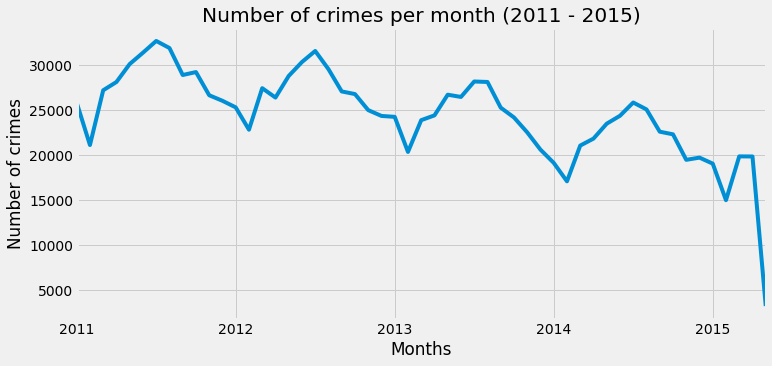

In [27]:
plt.figure(figsize=(11, 5))
df.resample('M').size().plot(legend=False)
plt.title('Number of crimes per month (2011 - 2015)')
plt.xlabel('Months')
plt.ylabel('Number of crimes')
plt.show()

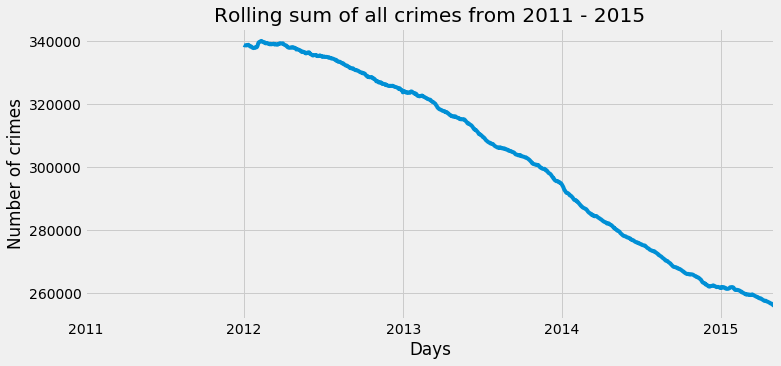

In [28]:
plt.figure(figsize=(11, 5))
df.resample('D').size().rolling(365).sum().plot(legend=False)
plt.title('Rolling sum of all crimes from 2011 - 2015')
plt.ylabel('Number of crimes')
plt.xlabel('Days')
plt.show()

In [30]:
crimes_count = df.pivot_table('ID', aggfunc=np.size, columns='Primary.Type', index=df.index.date, fill_value=0)

In [31]:
crimes_count.index = pd.DatetimeIndex(crimes_count.index)

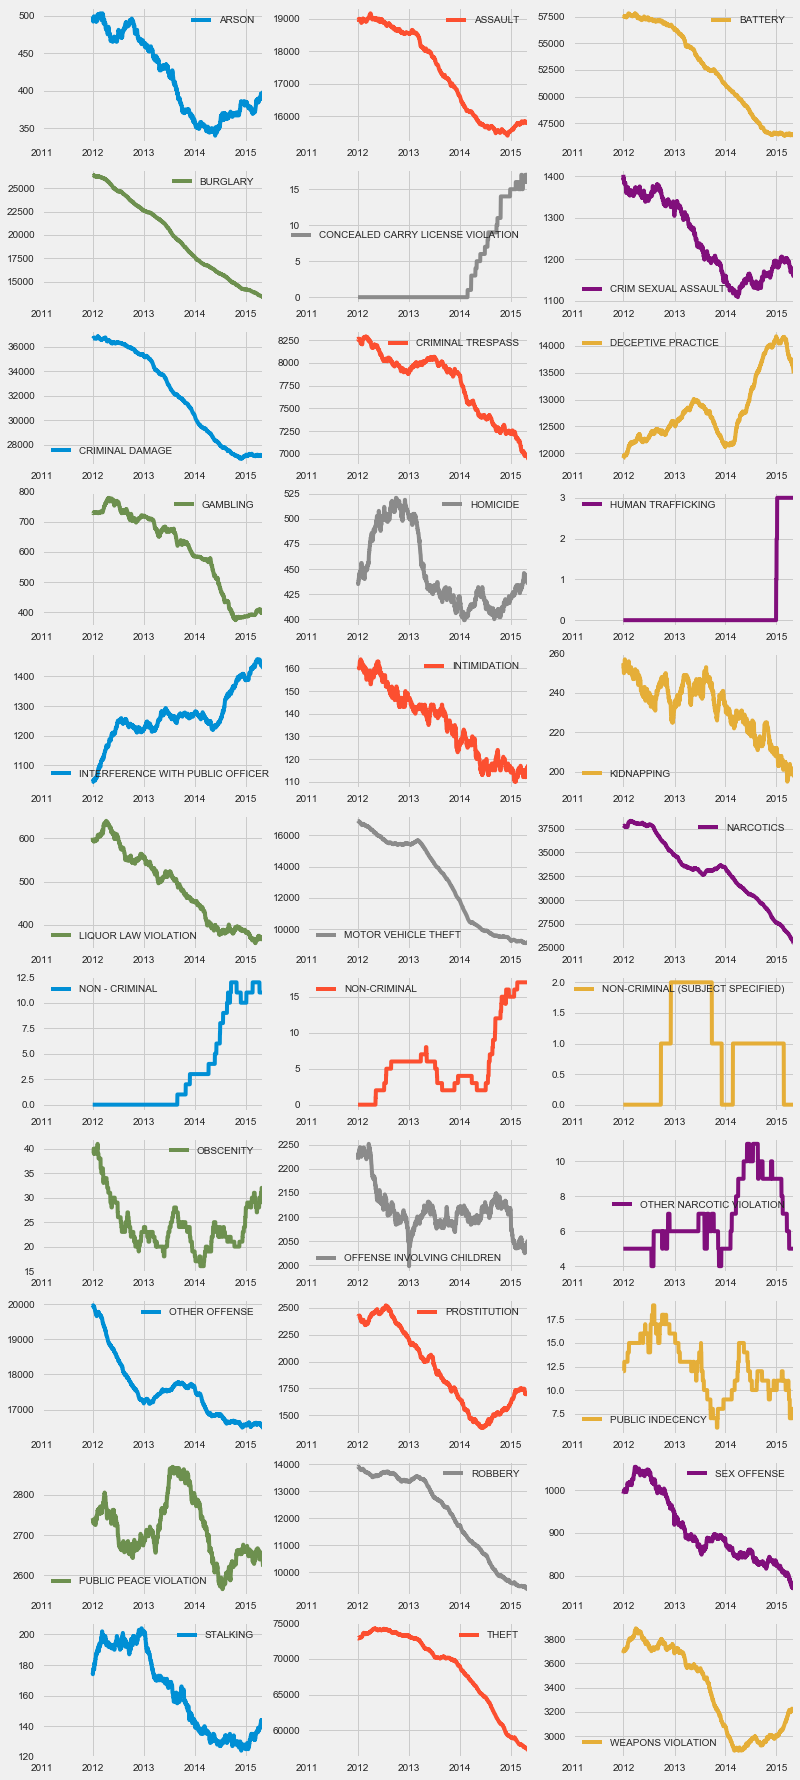

In [106]:
plo = crimes_count.rolling(365).sum().plot(figsize=(12, 30), subplots=True, layout=(-1, 3), sharex=False, sharey=False)

In [33]:
days = ['Monday','Tuesday','Wednesday',  'Thursday', 'Friday', 'Saturday', 'Sunday']

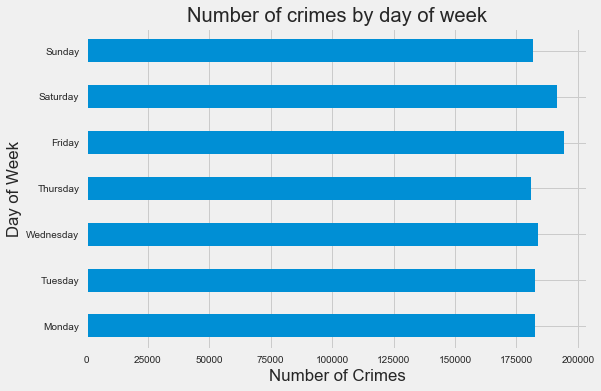

In [107]:
df.groupby([df.index.dayofweek]).size().plot(kind = 'barh')
plt.title('Number of crimes by day of week')
plt.xlabel('Number of Crimes')
plt.ylabel('Day of Week')
plt.yticks(np.arange(7), days)
plt.show()

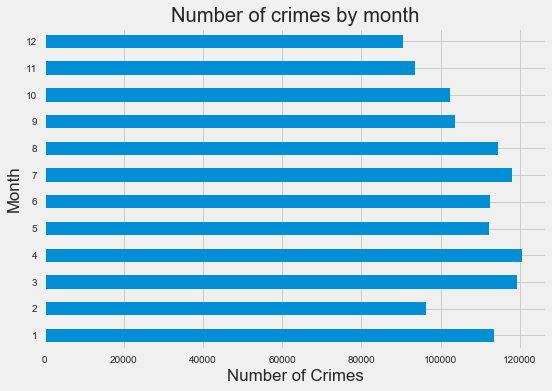

In [108]:
df.groupby([df.index.month]).size().plot(kind = 'barh')
plt.title('Number of crimes by month')
plt.xlabel('Number of Crimes')
plt.ylabel('Month')
plt.show()

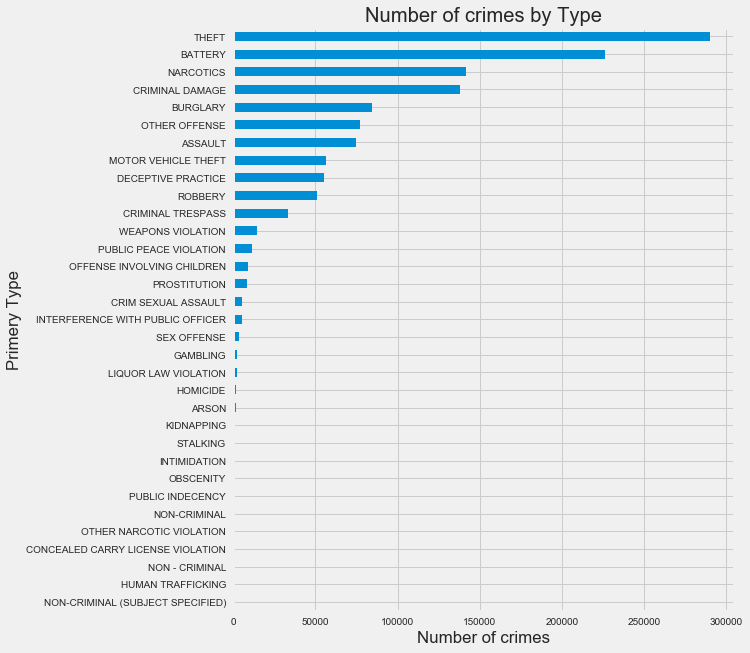

In [109]:
plt.figure(figsize=(8, 10))
df.groupby([df['Primary.Type']]).size().sort_values(ascending=True).plot(kind = 'barh')
plt.title('Number of crimes by Type')
plt.xlabel('Number of crimes')
plt.ylabel('Primery Type')
plt.show()

In [37]:
df.groupby(df['Location.Description']).size().sort_values(ascending=False).head(20)

Location.Description
STREET                            305591
RESIDENCE                         213069
APARTMENT                         166723
SIDEWALK                          157116
OTHER                              47736
PARKING LOT/GARAGE(NON.RESID.)     37988
ALLEY                              29704
RESIDENTIAL YARD (FRONT/BACK)      27537
SMALL RETAIL STORE                 24658
RESIDENCE-GARAGE                   24145
RESIDENCE PORCH/HALLWAY            23142
VEHICLE NON-COMMERCIAL             22306
RESTAURANT                         21341
DEPARTMENT STORE                   17726
GROCERY FOOD STORE                 14463
GAS STATION                        13392
PARK PROPERTY                      10997
BAR OR TAVERN                       8931
CTA PLATFORM                        8151
COMMERCIAL / BUSINESS OFFICE        6847
dtype: int64

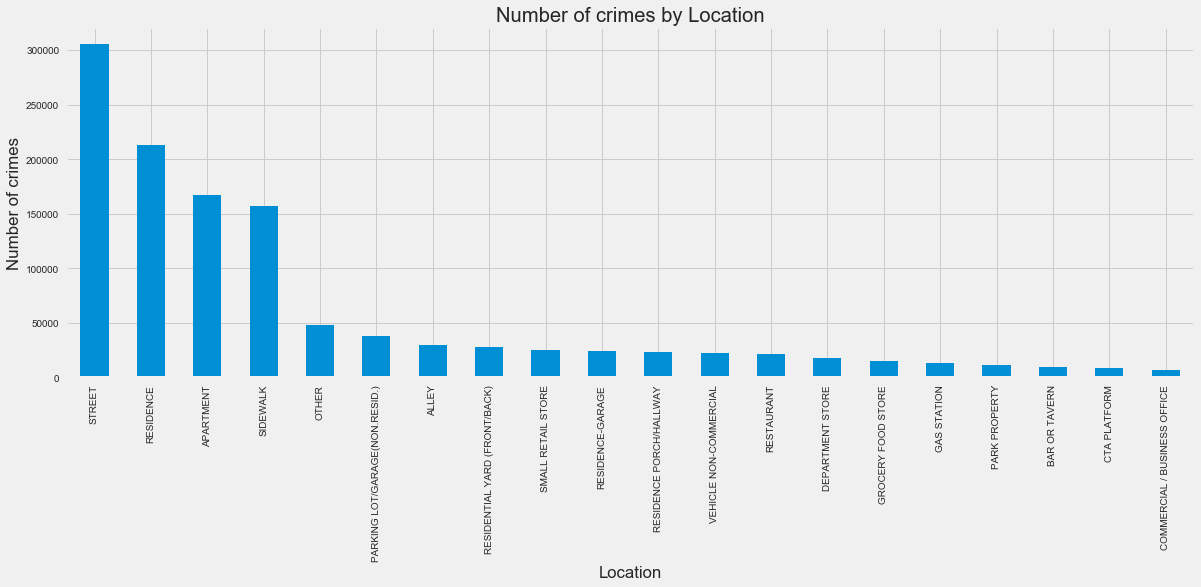

In [110]:
plt.figure(figsize=(18, 6))
df.groupby([df['Location.Description']]).size().sort_values(ascending=False).head(20).plot(kind='bar')
plt.title('Number of crimes by Location')
plt.ylabel('Number of crimes')
plt.xlabel('Location')
plt.show()

In [113]:
dayofweek_by_location = df.pivot_table(values='ID', index='Location.Description', columns=df.index.dayofweek, aggfunc=np.size).fillna(0)

In [114]:
dayofweek_by_type = df.pivot_table(values='ID', index='Primary.Type', columns=df.index.dayofweek, aggfunc=np.size).fillna(0)

In [162]:
location_by_type  = df.pivot_table(values='ID', index='Location.Description', columns='Primary.Type', aggfunc=np.size).fillna(0)

In [116]:
from sklearn.cluster import AgglomerativeClustering as AC

In [117]:
def scale_df(df,axis=0):
    '''
    A utility function to scale numerical values (z-scale) to have a mean of zero
    and a unit variance.
    '''
    return (df - df.mean(axis=axis)) / df.std(axis=axis)

def plot_hmap(df, ix=None, cmap='bwr'):
    '''
    A function to plot heatmaps that show temporal patterns
    '''
    if ix is None:
        ix = np.arange(df.shape[0])
    plt.imshow(df.iloc[ix,:], cmap=cmap)
    plt.colorbar(fraction=0.03)
    plt.yticks(np.arange(df.shape[0]), df.index[ix])
    plt.xticks(np.arange(df.shape[1]))
    plt.grid(False)
    plt.show()

def scale_and_plot(df, ix = None):
    '''
    A wrapper function to calculate the scaled values within each row of df and plot_hmap
    '''
    df_marginal_scaled = scale_df(df.T).T
    if ix is None:
        ix = AC(4).fit(df_marginal_scaled).labels_.argsort() # a trick to make better heatmaps
    cap = np.min([np.max(df_marginal_scaled.as_matrix()), np.abs(np.min(df_marginal_scaled.as_matrix()))])
    df_marginal_scaled = np.clip(df_marginal_scaled, -1*cap, cap)
    plot_hmap(df_marginal_scaled, ix=ix)

def normalize(df):
    result = df.copy()
    for feature_name in df.columns:
        max_value = df[feature_name].max()
        min_value = df[feature_name].min()
        result[feature_name] = (df[feature_name] - min_value) / (max_value - min_value)
    return result

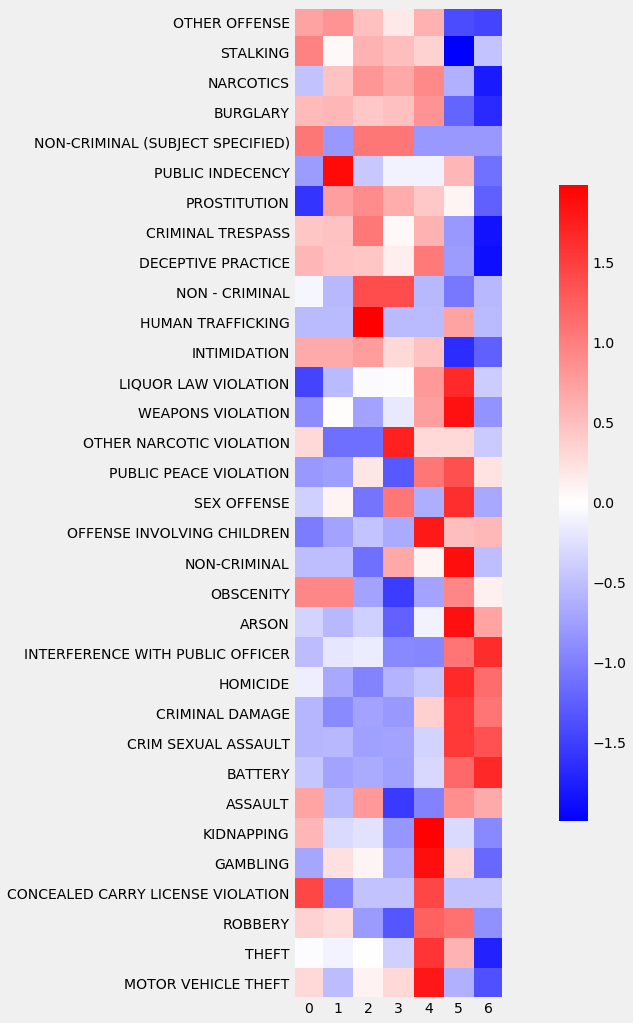

In [118]:
plt.figure(figsize=(17,17))
scale_and_plot(dayofweek_by_type)

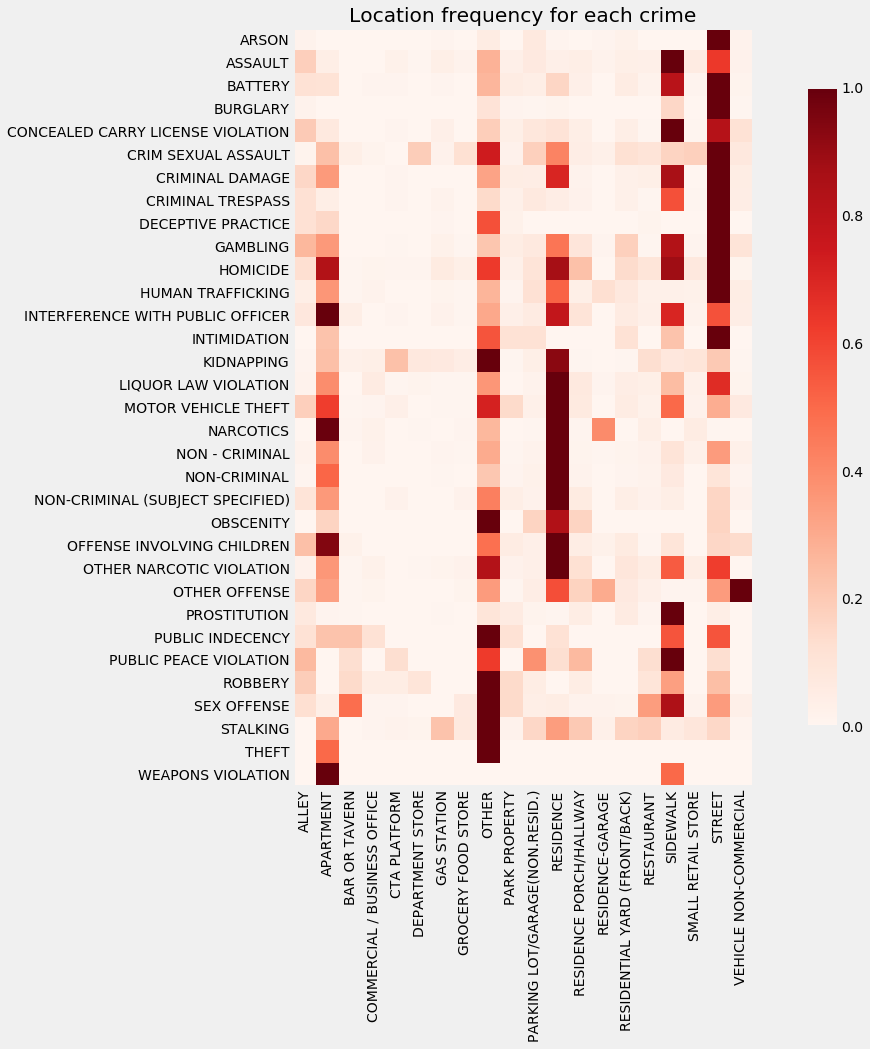

In [164]:
df2 = normalize(location_by_type)
ix = AC(3).fit(df2.T).labels_.argsort() # a trick to make better heatmaps
plt.figure(figsize=(17,13))
plt.imshow(df2.T.iloc[ix,:], cmap='Reds')
plt.colorbar(fraction=0.03)
plt.xticks(np.arange(df2.shape[0]), df2.index, rotation='vertical')
plt.yticks(np.arange(df2.shape[1]), df2.columns)
plt.title('Location frequency for each crime')
plt.grid(False)
plt.show()

# Clustering

In [45]:
from sklearn.cluster import KMeans

In [97]:
features = df2[['Latitude', 'Longitude', 'District',]].dropna()

In [98]:
n_clusters = df['District'].nunique()

In [99]:
km = KMeans(n_clusters)

In [100]:
km_fit = km.fit(features)

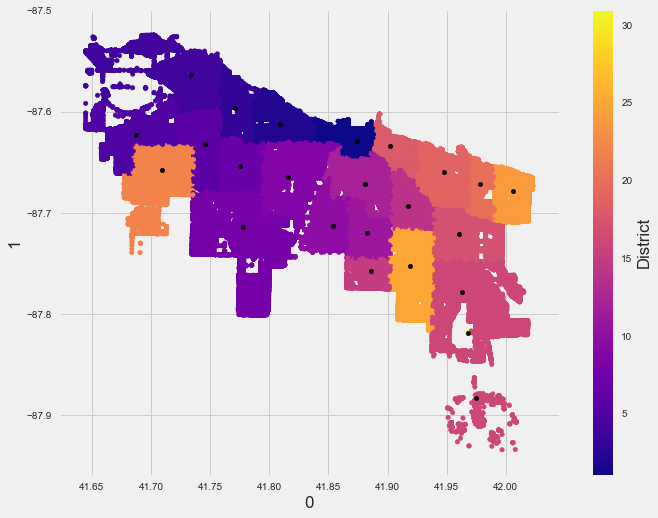

In [112]:
# ax = features.plot(kind='scatter', x='Latitude', y='Longitude', c='District', legend=str(num_clusters), figsize=(10, 8), colormap='plasma')
# pd.DataFrame(km_fit.cluster_centers_).plot(kind='scatter', x=0, y=1, color='k', ax=ax)

ax = features.plot(kind='scatter', x='Latitude', y='Longitude', c='District', legend=str(n_clusters), figsize=(10, 8), colormap='plasma')
pd.DataFrame(km_fit.cluster_centers_).plot(kind='scatter', x=0, y=1, color='k', ax=ax)

# Forecast next 6 months

In [140]:
from fbprophet import Prophet

In [30]:
df.head()

,ID,Date,Primary.Type,Description,Location.Description,Arrest,Domestic,District,Latitude,Longitude,Year,Month
Date,,,,,,,,,,,,
2015-05-05,10060004,2015-05-05,BATTERY,SIMPLE,SIDEWALK,True,True,6.0,41.750667,-87.649760,2015,5
2015-05-05,10059982,2015-05-05,BATTERY,OTHER,RESIDENCE,True,True,5.0,41.702292,-87.622050,2015,5
2015-05-05,10059953,2015-05-05,NARCOTICS,OTHER,SIDEWALK,True,True,13.0,41.891381,-87.667301,2015,5
2015-05-05,10060015,2015-05-05,CRIM SEXUAL ASSAULT,OTHER,ALLEY,True,True,13.0,41.891741,-87.668241,2015,5
2015-05-05,10059944,2015-05-05,NARCOTICS,POSS: HEROIN(WHITE),STREET,True,True,3.0,41.763624,-87.622883,2015,5


In [73]:
fc_df = df[['District']]

In [74]:
type(fc_df)

pandas.core.frame.DataFrame

In [75]:
fc_df.reset_index(inplace=True)

In [79]:
fc_df = df.groupby(['Date', 'District']).size()

/Users/lrezende/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: 'Date' is both a column name and an index level.
Defaulting to column but this will raise an ambiguity error in a future version
  """Entry point for launching an IPython kernel.


In [81]:
fc_df = fc_df.reset_index()

In [86]:
fc_df.columns = ['ds', 'District', 'y']
fc_df.head(3)

,ds,District,y
0,2011-01-01,1.0,38
1,2011-01-01,2.0,63
2,2011-01-01,3.0,77


In [87]:
fc_df3.columns

Index(['ds', 'District', 'y'], dtype='object')

In [99]:
fc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34948 entries, 0 to 34947
Data columns (total 3 columns):
ds          34948 non-null datetime64[ns]
District    34948 non-null float64
y           34948 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 819.2 KB


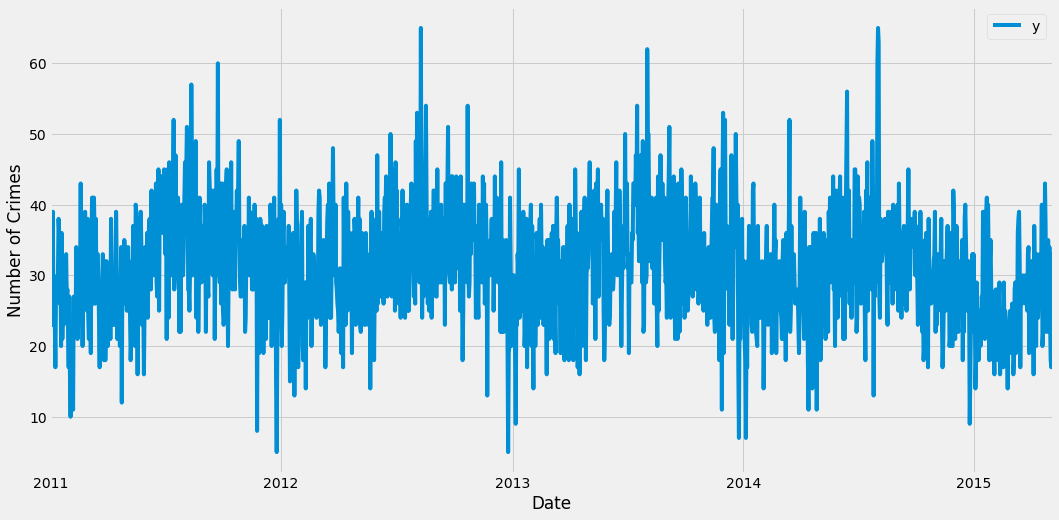

In [141]:
# =============================================
# Specify the desired district for prediction.
# =============================================
aux = fc_df[fc_df['District']==1.0]
aux = aux[['ds', 'y']]

ax = aux.set_index('ds').plot(figsize=(16, 8))
ax.set_ylabel('Number of Crimes')
ax.set_xlabel('Date')

plt.show()

In [107]:
my_model = Prophet(interval_width=0.95)

In [108]:
my_model.fit(aux)

INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [109]:
future_dates = my_model.make_future_dataframe(periods=6, freq='MS')
future_dates.tail()

,ds
1587,2015-07-01
1588,2015-08-01
1589,2015-09-01
1590,2015-10-01
1591,2015-11-01


In [110]:
forecast = my_model.predict(future_dates)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
1587,2015-07-01,33.586777,20.185950,46.127499
1588,2015-08-01,33.473797,21.008783,46.410026
1589,2015-09-01,30.909930,19.147035,44.354961
1590,2015-10-01,31.043791,18.462102,43.193725
1591,2015-11-01,23.806927,9.616631,36.586155


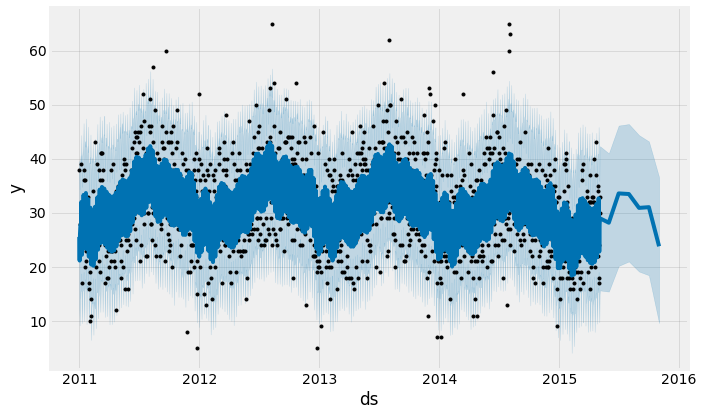

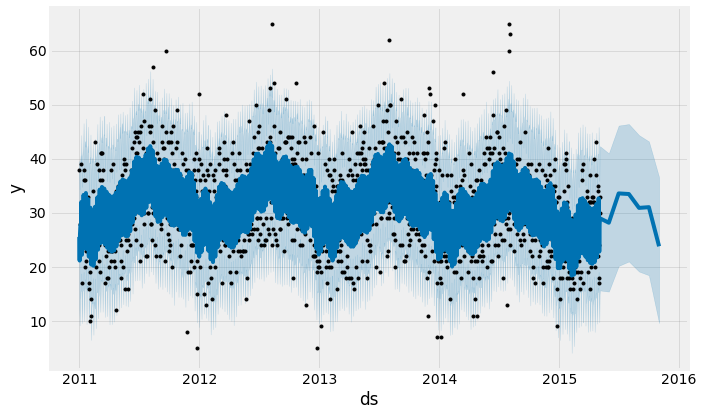

In [130]:
my_model.plot(forecast, uncertainty=True)

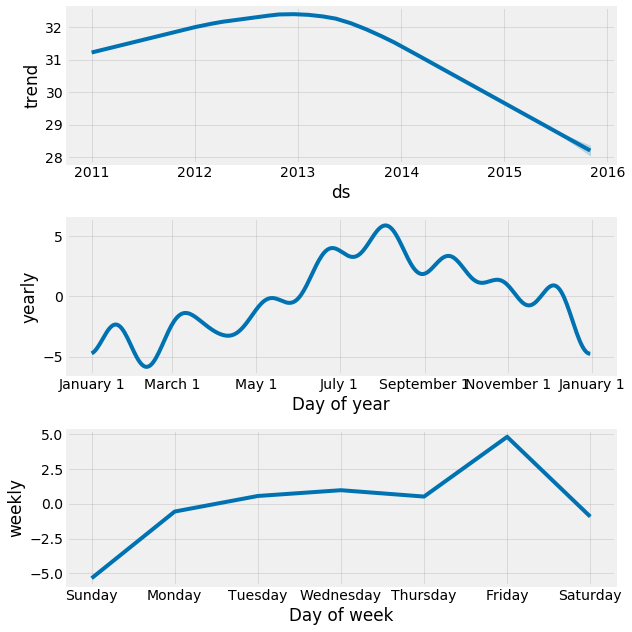

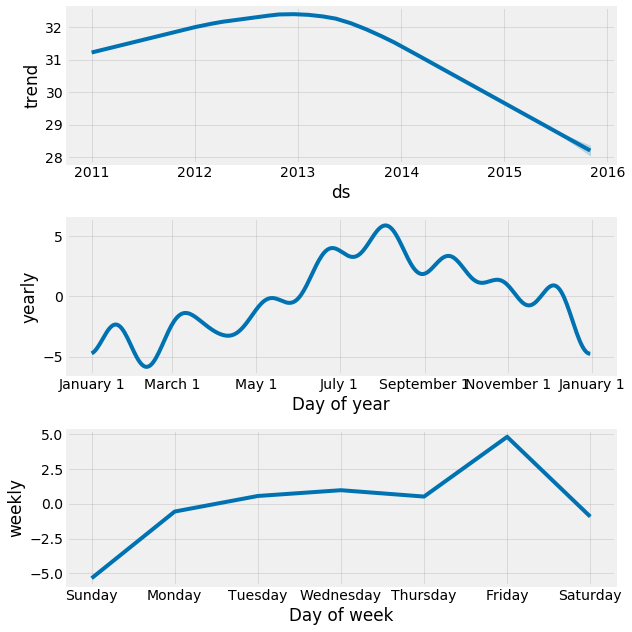

In [112]:
my_model.plot_components(forecast)

# Forecast next 12 months

In [142]:
# =============================================
# Specify the desired district for prediction.
# =============================================
aux = fc_df[fc_df['District']==5.0]
aux = aux[['ds', 'y']]

# ax = aux.set_index('ds').plot(figsize=(16, 8))
# ax.set_ylabel('Number of Crimes')
# ax.set_xlabel('Date')

# plt.show()

In [143]:
my_model = Prophet(interval_width=0.95)

In [144]:
my_model.fit(aux)

INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [145]:
future_dates = my_model.make_future_dataframe(periods=12, freq='MS')
future_dates.tail()

,ds
1593,2016-01-01
1594,2016-02-01
1595,2016-03-01
1596,2016-04-01
1597,2016-05-01


In [146]:
forecast = my_model.predict(future_dates)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
1593,2016-01-01,21.339116,7.572256,33.808211
1594,2016-02-01,20.381348,7.929179,34.616285
1595,2016-03-01,22.099003,8.558577,35.138451
1596,2016-04-01,26.976910,13.637639,40.246469
1597,2016-05-01,25.808006,12.072788,38.587033


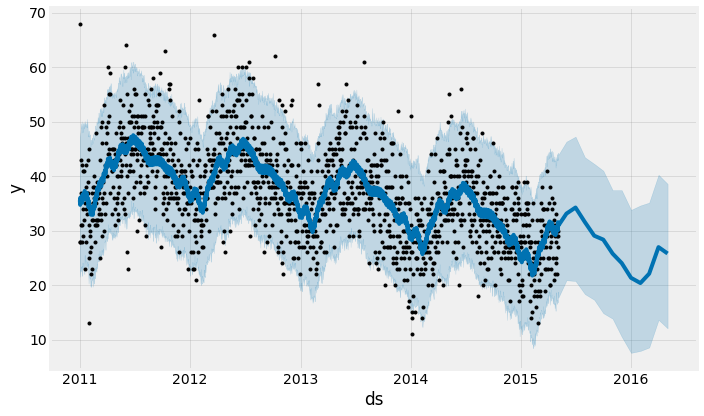

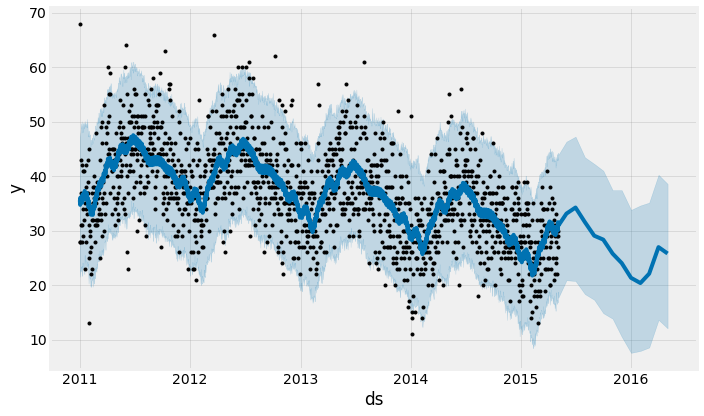

In [147]:
my_model.plot(forecast, uncertainty=True)

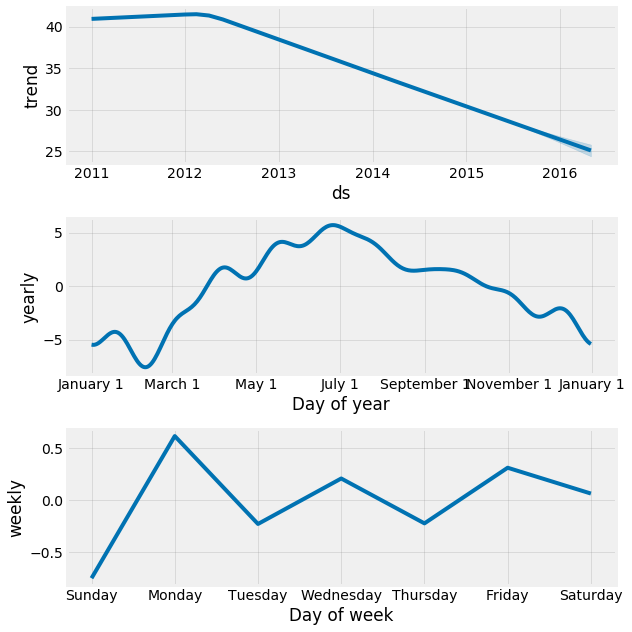

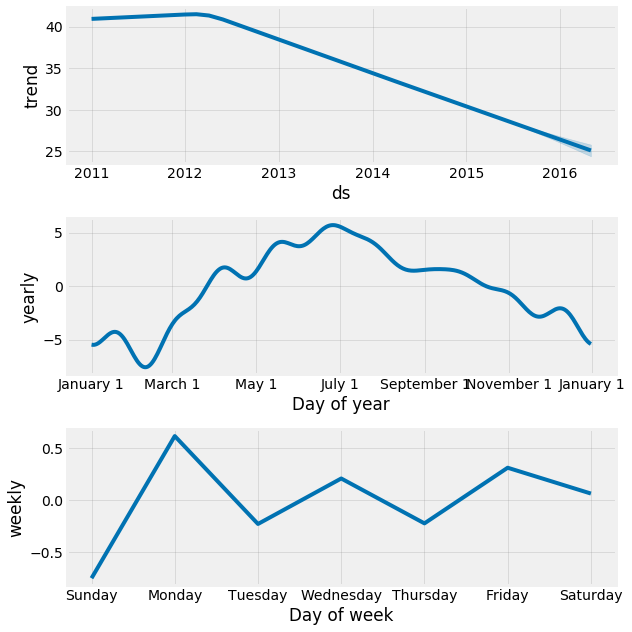

In [148]:
my_model.plot_components(forecast)